In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [3]:
classes = data.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(data)

68

In [5]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
   

(32, 256, 256, 3)
[2 1 1 0 2 0 0 1 1 2 2 1 1 0 0 0 1 0 1 2 0 1 1 0 0 0 1 0 0 0 1 0]


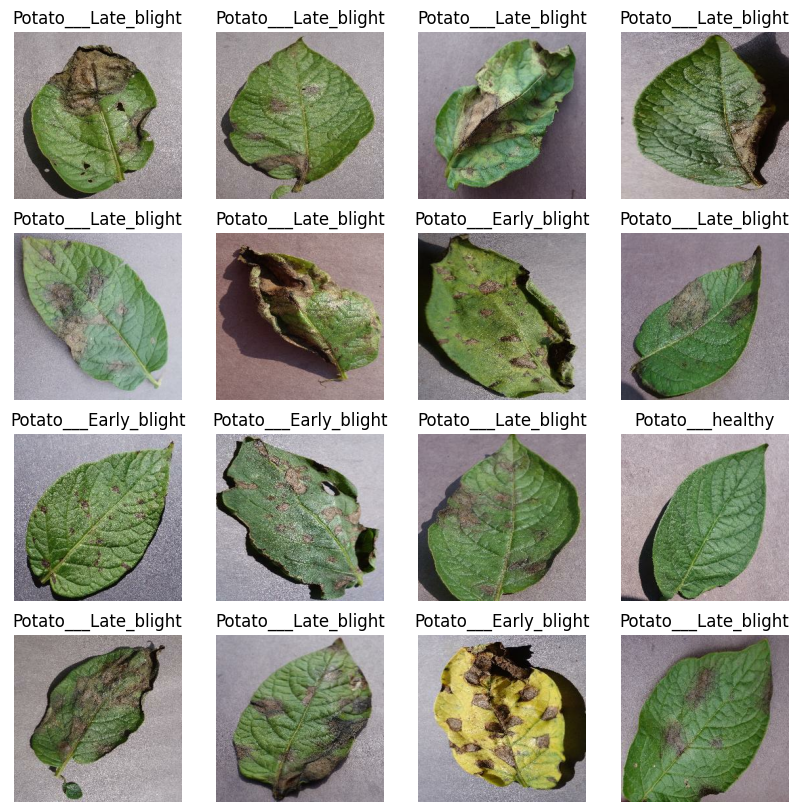

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    for i in range (16):
        show = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")

In [7]:
train_size = 0.8
val_size = 0.10
test_sie = 0.10

In [8]:
len(data)*train_size

54.400000000000006

In [9]:
len(data)*val_size

6.800000000000001

In [10]:
train_set= data.take(54)
print(len(train_set))

remain_set= data.skip(54)
val_set= remain_set.take(6)
print(len(val_set))

test_set= remain_set.skip(6)
print(len(test_set))

54
6
8


In [11]:
train_set= train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set= val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set= test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
preprocessing = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
model = models.Sequential([
    preprocessing,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape= (32, 256, 256, 3))
    

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 3)                │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,875 (655.76 KB)

 Trainable params: 167,875 (655.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history= model.fit(train_set, epochs=20, batch_size=32, verbose=1, validation_data= val_set)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.4967 - loss: 0.9253 - val_accuracy: 0.5573 - val_loss: 0.7773
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6885 - loss: 0.7518 - val_accuracy: 0.7448 - val_loss: 0.6024
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.8140 - loss: 0.4588 - val_accuracy: 0.7917 - val_loss: 0.4921
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.8764 - loss: 0.3158 - val_accuracy: 0.8385 - val_loss: 0.3589
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.8768 - loss: 0.2663 - val_accuracy: 0.9115 - val_loss: 0.2080
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.8991 - loss: 0.2423 - val_accuracy: 0.9635 - val_loss: 0.1533
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9141 - loss: 0.2220 - val_accuracy: 0.9115 - val_loss: 0.1742
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9318 - loss: 0.1799 - val_accuracy: 0.9219 - v

In [18]:
scores = model.evaluate(test_set)
print(scores)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 697ms/step - accuracy: 0.9820 - loss: 0.0595
[0.04803403466939926, 0.982758641242981]


In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [20]:
accuracy= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

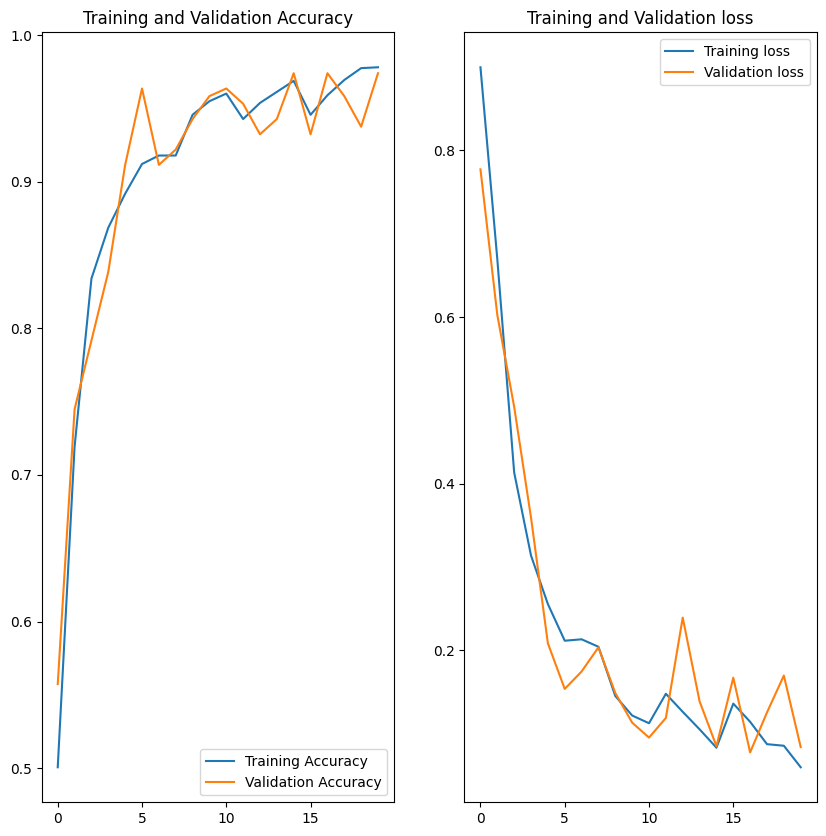

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(20), accuracy, label= 'Training Accuracy')
plt.plot(range(20), val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label= 'Training loss')
plt.plot(range(20), val_loss, label= 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

plt.show()

first image to predict
first image actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
first image predict label: Potato___Late_blight


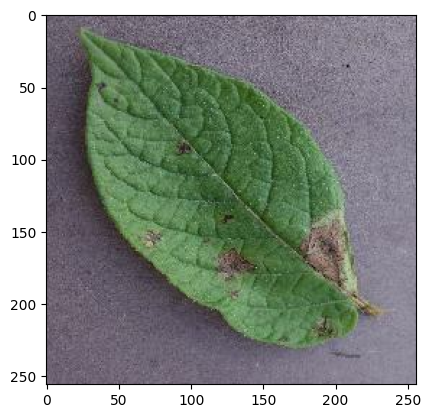

In [22]:
import numpy as np
for image_batch, labels_batch in test_set.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", classes[first_label])

    batch_pred = model.predict(image_batch)
    print("first image predict label:", classes[np.argmax(batch_pred[0])])
      

In [23]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


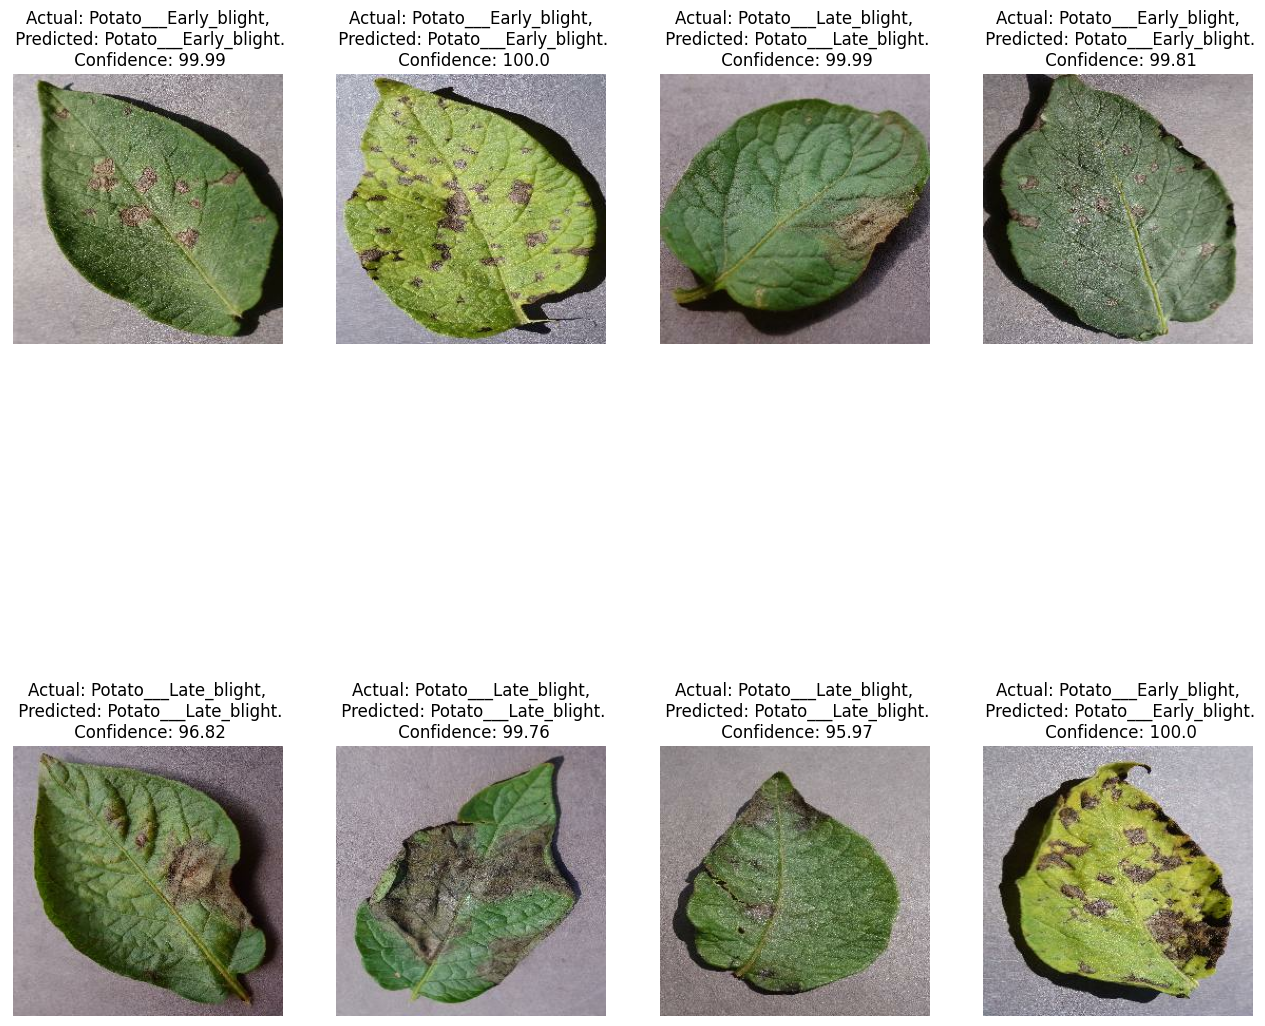

In [24]:
plt.figure(figsize=(16,16))
for images, labels in test_set.take(1):
    for i in range(8):
        show = plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = classes[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")
        plt.axis("off")



In [25]:
# import pickle
# filename = 'train_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [26]:
pip install h5py --upgrade


  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/86/f7/bb465dcb92ca3521a15cbe1031f6d18234dbf1fb52a6796a00bfaa846ebf/h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
    --------------------------------------- 0.0/3.0 MB 281.8 kB/s eta 0:00:11
   - -------------------------------------- 0.1/3.0 MB 819.2 kB/s eta 0:00:04
   - -------------------------------------- 0.1/3.0 MB 819.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/3.0 MB 841.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/3.0 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/3.0 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.0 MB 1.0 MB/s eta 0:00:03
   ---- ---------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khush\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\~5py\\defs.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
model.save('train_model.keras')  # Saves the model in the new .keras format
